In [2]:
import pandas as pd

In [18]:
df = pd.read_csv("df_final_visu.csv")

C:\Users\X415\AppData\Local\Temp\ipykernel_20316\1975736236.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



In [19]:
duplicates = df.duplicated()
if duplicates.any():
    df.drop_duplicates(inplace=True)

In [20]:
#Optimisation des types
df['code_postal'] = df['code_postal'].astype('category')
df['region'] = df['region'].astype('category')
df['departement'] = df['departement'].astype('category')
df['zone'] = df['zone'].astype('category')
df['grand_secteur_d_activite'] = df['grand_secteur_d_activite'].astype('category')
df['secteur_na17'] = df['secteur_na17'].astype('category')
df['secteur_na38'] = df['secteur_na38'].astype('category')
df['secteur_na88'] = df['secteur_na88'].astype('category')
df['année'] = df['année'].astype('int32')

# Nan puis type
df['nb_effectif'] = df['nb_effectif'].fillna(0).astype('int')
df['nb_effectif_total'] = df['nb_effectif_total'].fillna(0).astype('int')
df['nb_entreprise'] = df['nb_entreprise'].fillna(0).astype('int')
df['nb_entreprise_total'] = df['nb_entreprise_total'].fillna(0).astype('int')






C:\Users\X415\AppData\Local\Temp\ipykernel_20316\1369658938.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



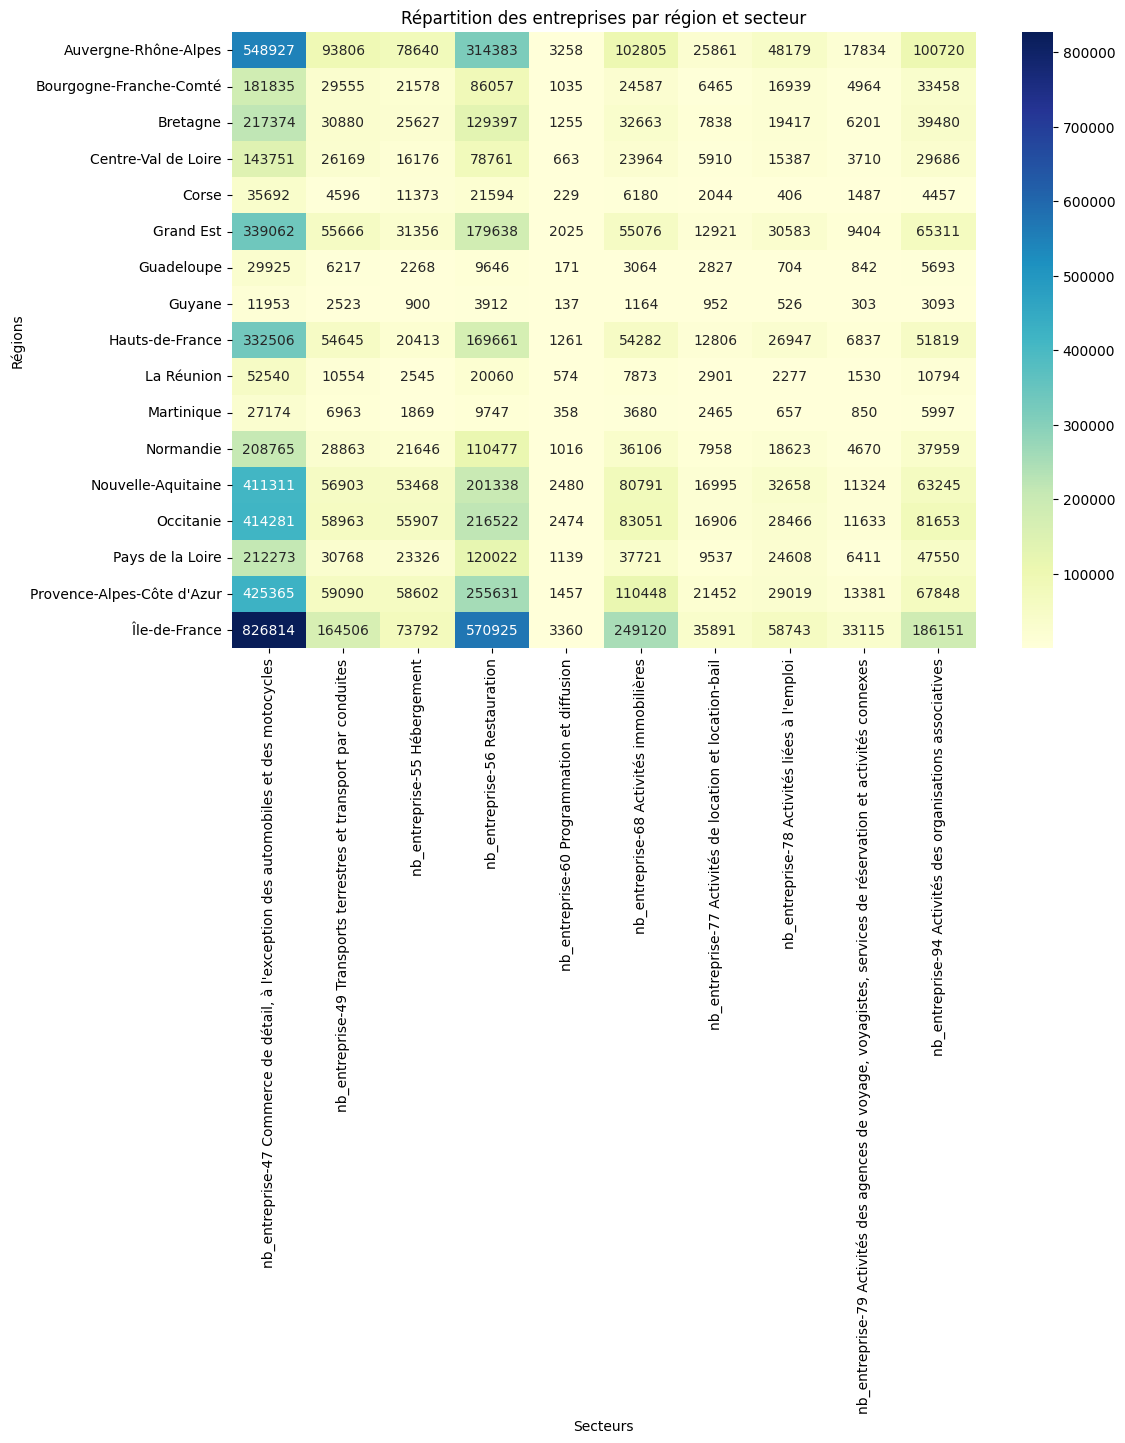

In [21]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

region_sector_data = df.groupby(['region', 'secteur_na88'])[['nb_entreprise']].sum().unstack().fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(region_sector_data, cmap='YlGnBu', annot=True, fmt=".0f")
plt.title("Répartition des entreprises par région et secteur")
plt.xlabel("Secteurs")
plt.ylabel("Régions")
plt.show()


In [35]:


#Definition des colonnes d'importance du secteur comparé à l'ensemble des secteurs économiques
df["part_effectif"] = df["nb_effectif"] / df["nb_effectif_total"].replace(0, np.nan)*100
df["part_entreprise"] = df["nb_entreprise"] / df["nb_entreprise_total"].replace(0, np.nan)*100


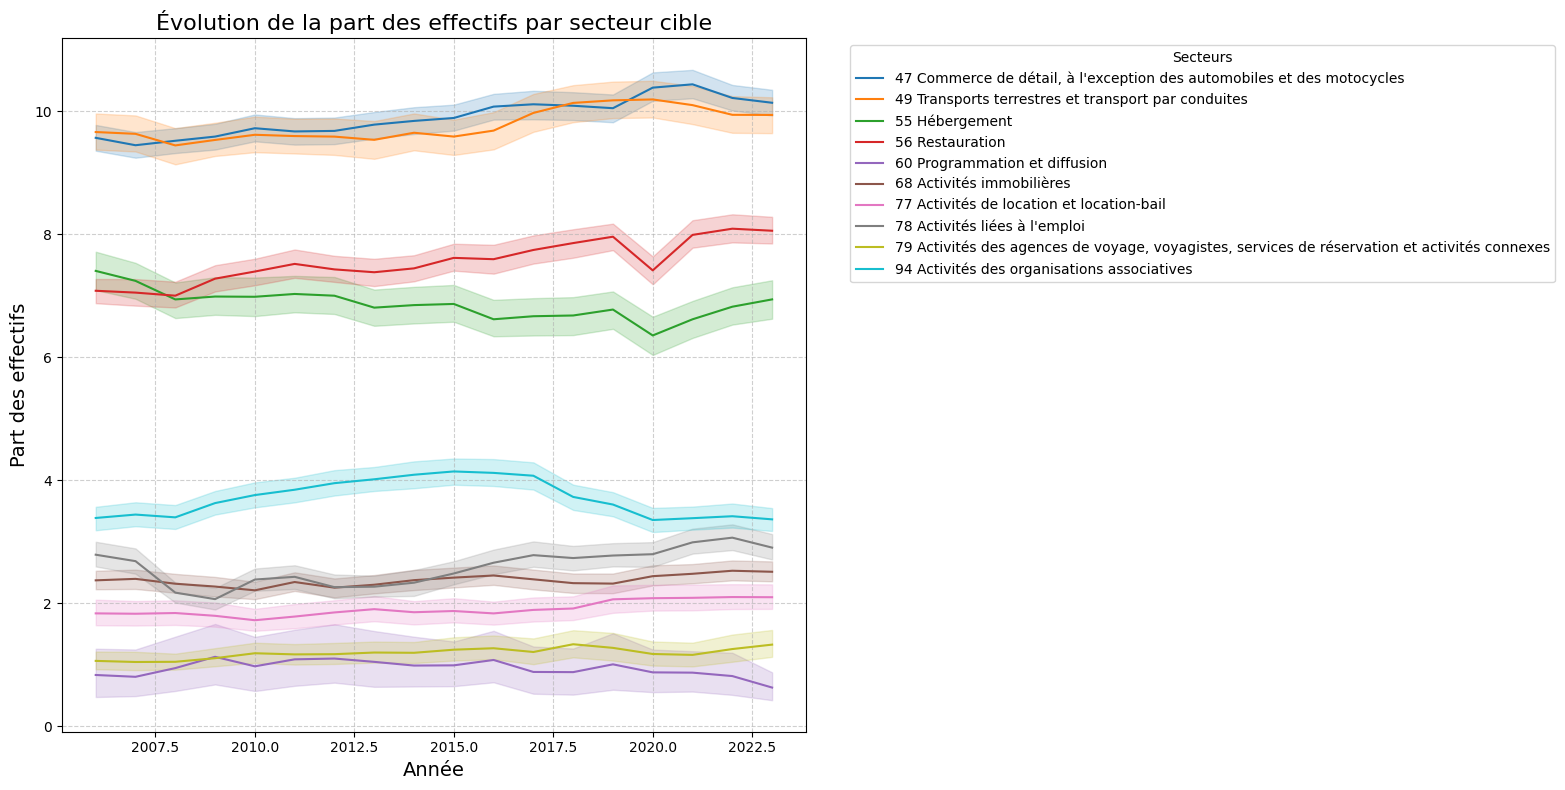

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer la visualisation
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df, 
    x='année', 
    y='part_effectif',  # Nom de la colonne mise à jour
    hue='secteur_na88', 
    palette='tab10'
)
plt.title("Évolution de la part des effectifs par secteur cible", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Part des effectifs", fontsize=14)  # Mis à jour pour refléter le nom de la colonne
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



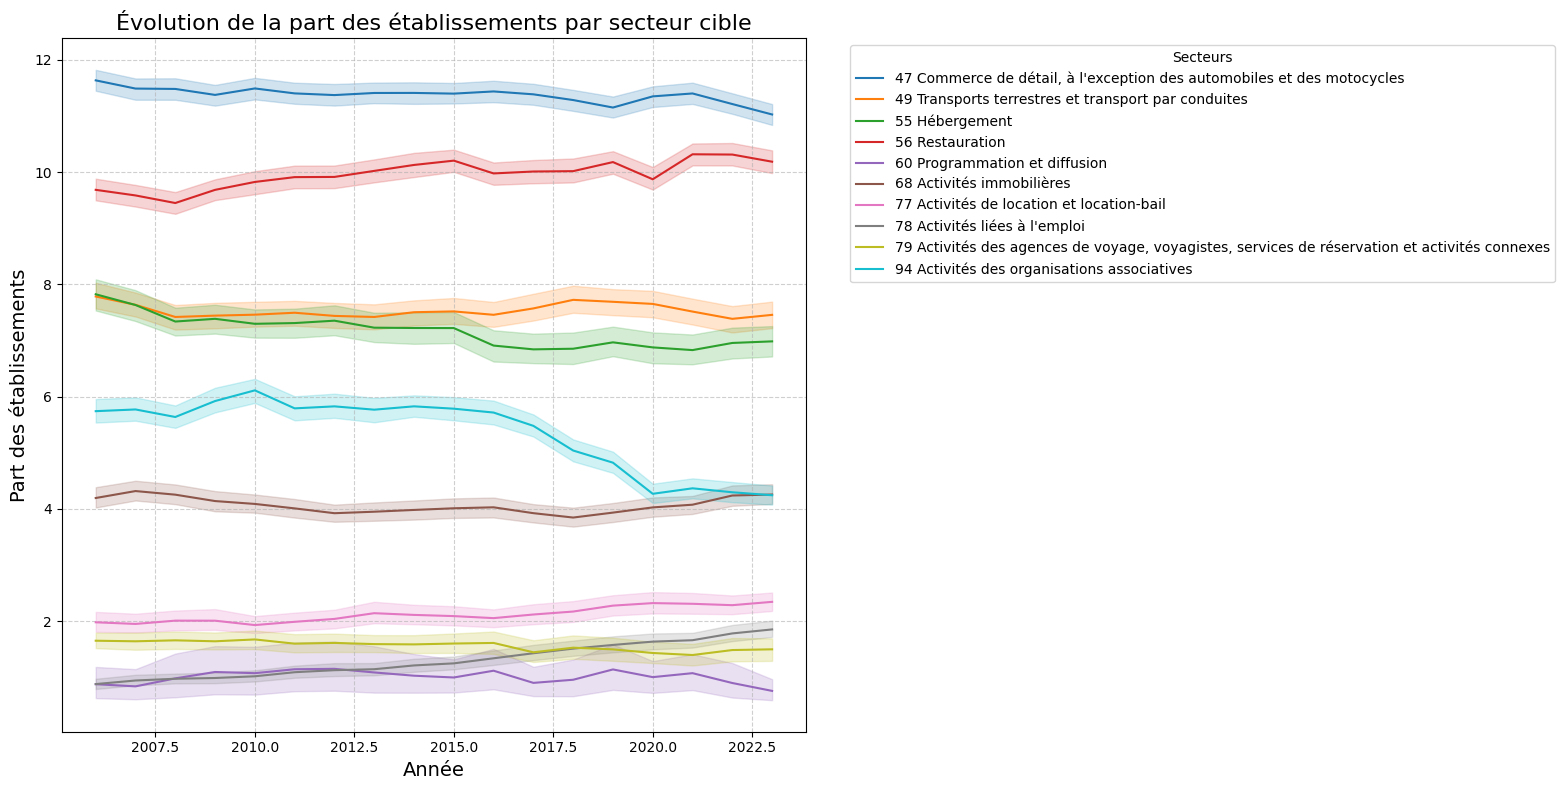

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Tracer la visualisation
plt.figure(figsize=(16, 8))
sns.lineplot(
    data=df, 
    x='année', 
    y='part_entreprise',  # Nom de la colonne mise à jour
    hue='secteur_na88', 
    palette='tab10'
)
plt.title("Évolution de la part des établissements par secteur cible", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Part des établissements", fontsize=14)  # Mis à jour pour refléter le nom de la colonne
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



In [ ]:
# Filtrer uniquement les données du Pas-de-Calais
df_pas_de_calais = df[df['departement'] == 'Pas-de-Calais']


In [37]:
df["part_effectif"] = df["part_effectif"].round(2)
df["part_entreprise"] = df["part_entreprise"].round(2)

In [40]:
df.drop(columns=["Unnamed: 0"], inplace=True)


In [44]:
# Colonnes originales à conserver
cols_to_keep = [
    'ville', 'code_postal', 'region', 'departement', 'zone', 
    'année', 'grand_secteur_d_activite', 'secteur_na17', 
    'secteur_na38', 'secteur_na88', 
    'nb_effectif', 'nb_effectif_total','part_effectif', 
    'nb_entreprise', 'nb_entreprise_total','part_entreprise'
]

# Garder uniquement les colonnes nécessaires
df = df[cols_to_keep]

# Vérification du DataFrame final
df.head()


,ville,code_postal,region,departement,zone,année,grand_secteur_d_activite,secteur_na17,secteur_na38,secteur_na88,nb_effectif,nb_effectif_total,part_effectif,nb_entreprise,nb_entreprise_total,part_entreprise
0,Abainville,55001,Grand Est,Meuse,Bar-le-Duc,2006,GS3 Commerce,GZ Commerce,"GZ Commerce, réparation d'automobiles et de mo...","47 Commerce de détail, à l'exception des autom...",4,80,5.00,2,10,20.00
1,Abainville,55001,Grand Est,Meuse,Bar-le-Duc,2007,GS3 Commerce,GZ Commerce,"GZ Commerce, réparation d'automobiles et de mo...","47 Commerce de détail, à l'exception des autom...",3,84,3.57,2,11,18.18
2,Abainville,55001,Grand Est,Meuse,Bar-le-Duc,2008,GS3 Commerce,GZ Commerce,"GZ Commerce, réparation d'automobiles et de mo...","47 Commerce de détail, à l'exception des autom...",3,75,4.00,2,12,16.67
3,Abainville,55001,Grand Est,Meuse,Bar-le-Duc,2009,GS3 Commerce,GZ Commerce,"GZ Commerce, réparation d'automobiles et de mo...","47 Commerce de détail, à l'exception des autom...",3,82,3.66,2,11,18.18
4,Abainville,55001,Grand Est,Meuse,Bar-le-Duc,2010,GS3 Commerce,GZ Commerce,"GZ Commerce, réparation d'automobiles et de mo...","47 Commerce de détail, à l'exception des autom...",2,83,2.41,2,14,14.29


"""
# Calcul du Score Sectoriel
Ce script calcule un score sectoriel basé sur plusieurs paramètres, permettant d'évaluer le dynamisme économique d'un secteur.

## Composantes du score :
1. **Part des effectifs** : Part des effectifs du secteur par rapport au total des effectifs.
2. **Part des établissements** : Part des établissements du secteur par rapport au total des établissements.
3. **Taux de croissance** : Variation relative des effectifs et établissements d'une année sur l'autre.
4. **Indice de localisation** : Mesure de la concentration d'un secteur dans une région par rapport à la moyenne nationale.
5. **Taux de nouvelles entreprises** : Proportion des entreprises créées par rapport au total d'entreprises dans le secteur.

## Formule du score sectoriel :
Le score est une moyenne pondérée des différentes composantes :


In [ ]:

# Poids des composantes
poids_effectifs = 0.5
poids_entreprises = 0.5

# Calcul du score brut (non normalisé)
df['score_sectoriel_raw'] = (
    (poids_effectifs * df['part_effectif']) +
    (poids_entreprises * df['part_entreprise']) 
)

# Normalisation min-max pour obtenir des scores entre 0 et 1
min_score = df['score_sectoriel_raw'].min()
max_score = df['score_sectoriel_raw'].max()

df['score_sectoriel'] = (df['score_sectoriel_raw'] - min_score) / (max_score - min_score)

# Supprimer la colonne intermédiaire
df.drop(columns=['score_sectoriel_raw'], inplace=True)

# Vérification du DataFrame final
df.head()


C:\Users\X415\AppData\Local\Temp\ipykernel_20316\3448627268.py:5: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



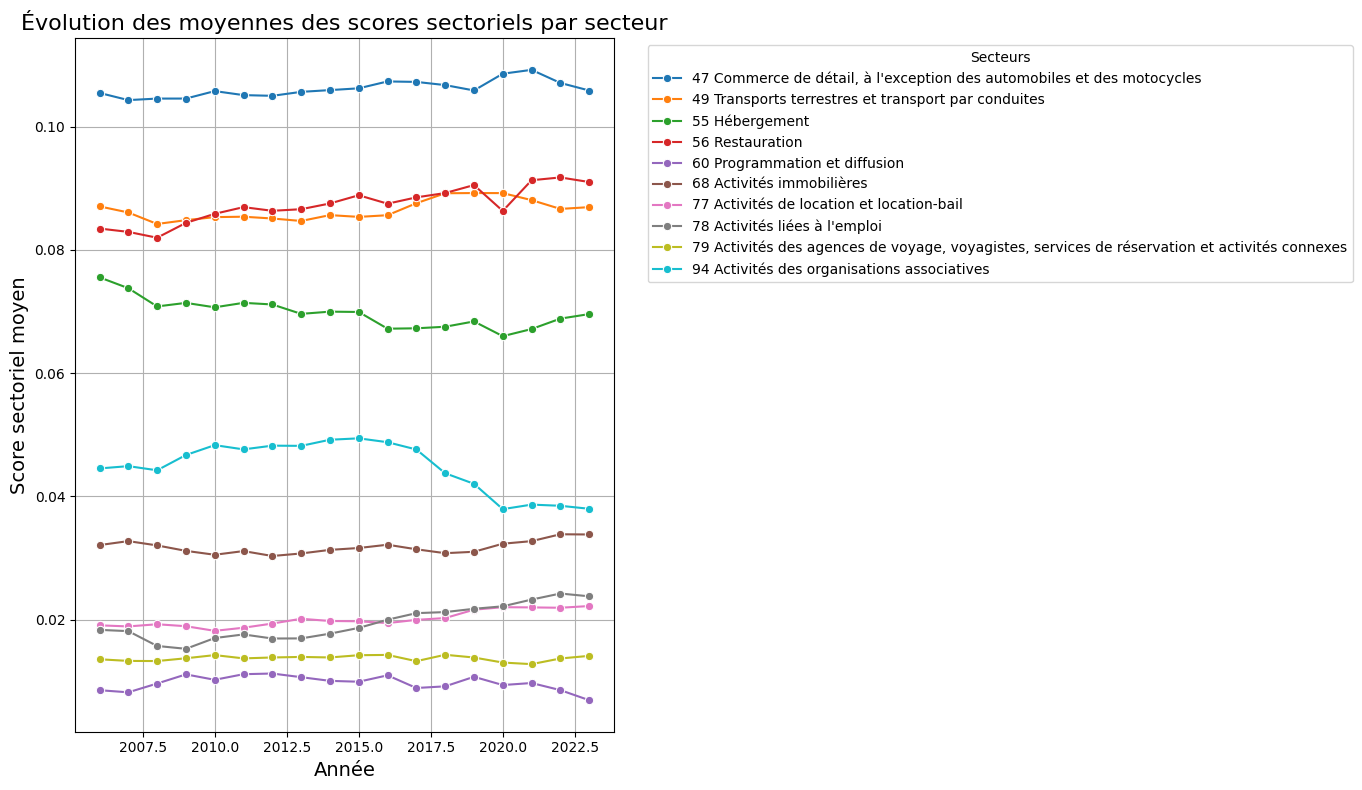

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calcul des moyennes des scores sectoriels par secteur et année
df_moyennes = df.groupby(['secteur_na88', 'année'])['score_sectoriel'].mean().reset_index()

# Visualisation de l'évolution des moyennes des scores sectoriels par secteur
plt.figure(figsize=(14, 8))
sns.lineplot(data=df_moyennes, x='année', y='score_sectoriel', hue='secteur_na88', marker='o')

# Ajustement du graphique
plt.title("Évolution des moyennes des scores sectoriels par secteur", fontsize=16)
plt.xlabel("Année", fontsize=14)
plt.ylabel("Score sectoriel moyen", fontsize=14)
plt.legend(title="Secteurs", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()



In [67]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact, widgets, VBox, HBox
import pandas as pd

# Fonction pour tracer le graphique
def plot_sector_for_filters(region, departement, zone, secteur):
    # Filtrer les données selon les choix
    df_filtered = df.copy()

    # Appliquer les filtres
    if region != "Toutes les régions":
        df_filtered = df_filtered[df_filtered['region'] == region]
    if departement != "Tous les départements":
        df_filtered = df_filtered[df_filtered['departement'] == departement]
    if zone != "Toutes les zones":
        df_filtered = df_filtered[df_filtered['zone'] == zone]
    if secteur != "Tous les secteurs":
        df_filtered = df_filtered[df_filtered['secteur_na88'] == secteur]

    # Vérifier s'il y a des données
    if df_filtered.empty:
        print("Aucune donnée correspondante pour les critères sélectionnés.")
        return

    # Création de la figure
    plt.figure(figsize=(20, 6))
    plt.style.use('default')  # Fond blanc par défaut

    # Tracer les courbes pour les secteurs sélectionnés
    sns.lineplot(
        data=df_filtered,
        x='année',
        y='score_sectoriel',
        hue='secteur_na88',
        marker='o',
        linewidth=1.5,
        legend='full'
    )

    # Personnalisation
    title_suffix = f" ({secteur})" if secteur != "Tous les secteurs" else ""
    plt.title(f"Évolution des scores sectoriels pour {zone}, {departement} ({region}){title_suffix}", fontsize=16)
    plt.xlabel("Année", fontsize=14)
    plt.ylabel("Score sectoriel", fontsize=14)
    plt.xticks(sorted(df['année'].unique()), fontsize=12)  # Années en entier
    plt.yticks(fontsize=12)
    plt.legend(
        title="Secteurs",
        title_fontsize=14,  # Taille de la police pour le titre de la légende
        fontsize=12,  # Taille de la police pour les éléments de la légende
        bbox_to_anchor=(1.05, 0.5),  # Position de la légende à droite
        loc='center left'
    )
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

# Fonction pour mettre à jour les options de départements et réinitialiser secteurs en fonction de la région sélectionnée
def update_departements_and_secteurs_options(change):
    selected_region = change['new']
    if selected_region == "Toutes les régions":
        departements_dropdown.options = ["Tous les départements"] + sorted(df['departement'].unique())
        departements_dropdown.value = "Tous les départements"
        zones_dropdown.options = ["Toutes les zones"]
        zones_dropdown.value = "Toutes les zones"
        secteurs_dropdown.value = "Tous les secteurs"  # Réinitialiser les secteurs
    else:
        departements_region = df[df['region'] == selected_region]['departement'].unique()
        departements_dropdown.options = ["Tous les départements"] + sorted(departements_region)
        departements_dropdown.value = "Tous les départements"
        zones_dropdown.options = ["Toutes les zones"]
        zones_dropdown.value = "Toutes les zones"
        secteurs_dropdown.value = "Tous les secteurs"  # Réinitialiser les secteurs

# Fonction pour mettre à jour les options de zones en fonction du département sélectionné
def update_zones_options(change):
    selected_departement = change['new']
    if selected_departement == "Tous les départements":
        zones_dropdown.options = ["Toutes les zones"]
        zones_dropdown.value = "Toutes les zones"
    else:
        zones_departement = df[df['departement'] == selected_departement]['zone'].unique()
        zones_dropdown.options = ["Toutes les zones"] + sorted(zones_departement)
        zones_dropdown.value = "Toutes les zones"

# Fonction pour mettre à jour la région lorsque le département est sélectionné
def update_region_selection(change):
    selected_departement = change['new']
    if selected_departement != "Tous les départements":
        corresponding_region = df[df['departement'] == selected_departement]['region'].iloc[0]
        regions_dropdown.value = corresponding_region

# Réinitialisation des menus déroulants
def reset_filters(_):
    regions_dropdown.value = "Toutes les régions"
    departements_dropdown.value = "Tous les départements"
    zones_dropdown.value = "Toutes les zones"
    secteurs_dropdown.value = "Tous les secteurs"

# Listes des options disponibles pour chaque menu
regions_disponibles = ["Toutes les régions"] + sorted(df['region'].unique())
departements_disponibles = ["Tous les départements"] + sorted(df['departement'].unique())
zones_disponibles = ["Toutes les zones"] + sorted(df['zone'].unique())
secteurs_disponibles = ["Tous les secteurs"] + sorted(df['secteur_na88'].unique())

# Widgets interactifs
regions_dropdown = widgets.Dropdown(
    options=regions_disponibles,
    value="Toutes les régions",
    description="Région :"
)

departements_dropdown = widgets.Dropdown(
    options=departements_disponibles,
    value="Tous les départements",
    description="Département :"
)

zones_dropdown = widgets.Dropdown(
    options=zones_disponibles,
    value="Toutes les zones",
    description="Zone :"
)

secteurs_dropdown = widgets.Dropdown(
    options=secteurs_disponibles,
    value="Tous les secteurs",
    description="Secteur :"
)

# Attacher les callbacks
regions_dropdown.observe(update_departements_and_secteurs_options, names='value')
departements_dropdown.observe(update_zones_options, names='value')

# Interface interactive avec `interact`
interact_ui = interact(
    plot_sector_for_filters,
    region=regions_dropdown,
    departement=departements_dropdown,
    zone=zones_dropdown,
    secteur=secteurs_dropdown
)


interactive(children=(Dropdown(description='Région :', options=('Toutes les régions', 'Auvergne-Rhône-Alpes', …